<a href="https://colab.research.google.com/github/dgromann/Programmieren_fuer_Translator_innen_2024S/blob/main/notebooks/LV6_Sentence_Similarity_mit_L%C3%B6sungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2024S: Einführung ins Programmieren für Translator:innen, Übung (UE), 340273-1**

### **Speichern Sie dieses Notebook**

Dieses Notebook können Sie jederzeit und in jedem Browser erneut von GitHub (bzw. dem direkten Link in Moodle) öffnen. Um jedoch Ihre eigenen Lösungen und Ihren Code zu speichern, wählen Sie bitte **Datei** bzw. **File** und eine der Speicheroptionen. Die einfachste Speicheroption ist in Google Drive, da dadurch Änderungen im Notebook automatisch im Hintergrund gespeichert werden.

Für die Abgabe der praktischen Übungen müssen Sie jedoch das Jupyter-Notebook als .ipynb Datei herunterladen. Dazu klicken Sie auf **Datei** oder **File** und **Herunterladen** oder **Download** und wählen das Format .ipynb aus.![cosine.png](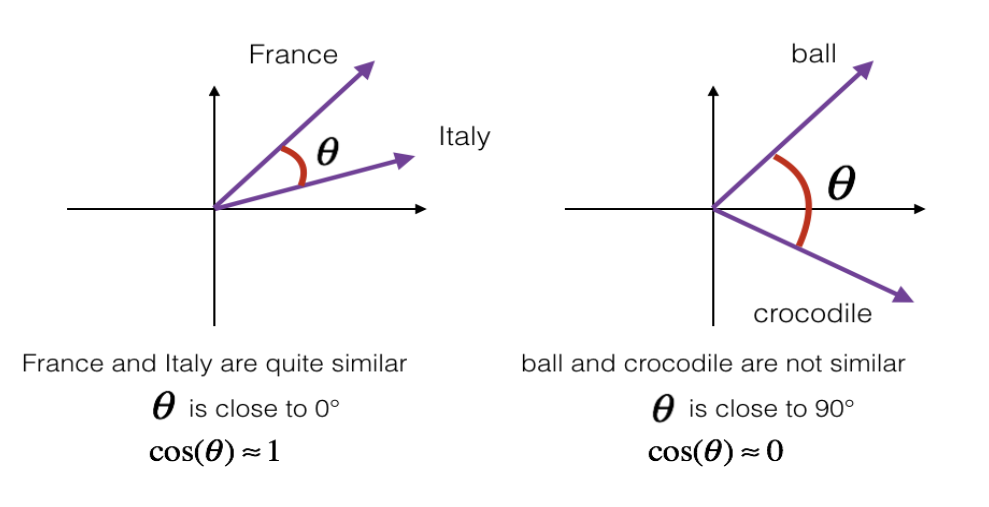![cosine.png](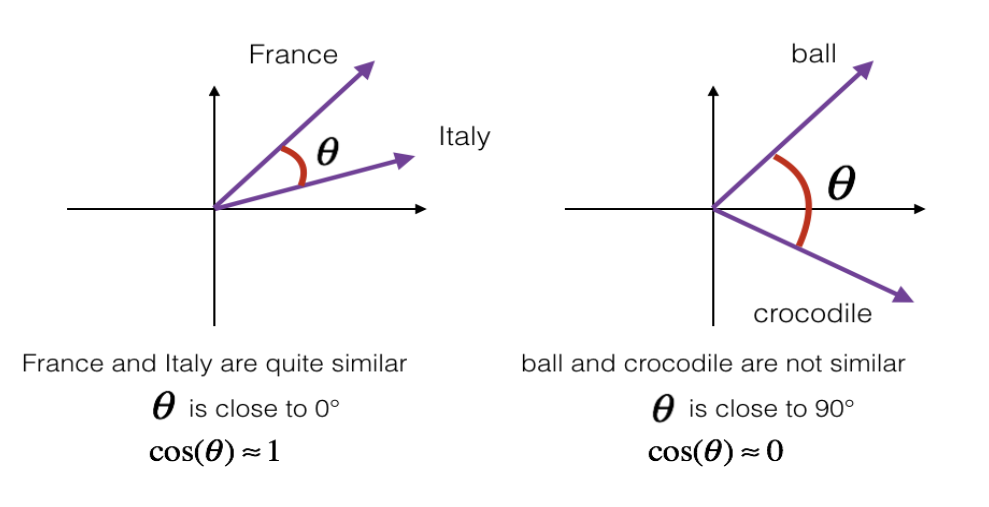![cosine.png](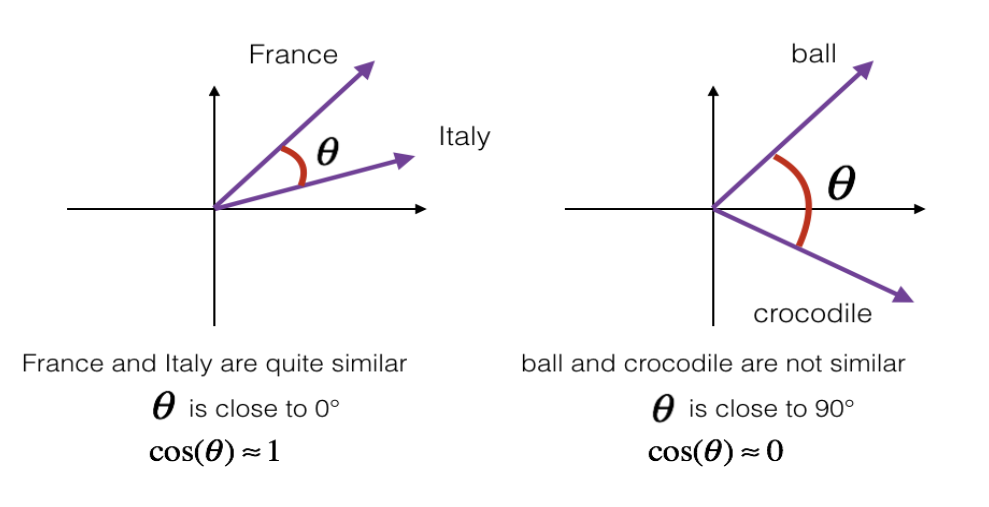![cosine.png](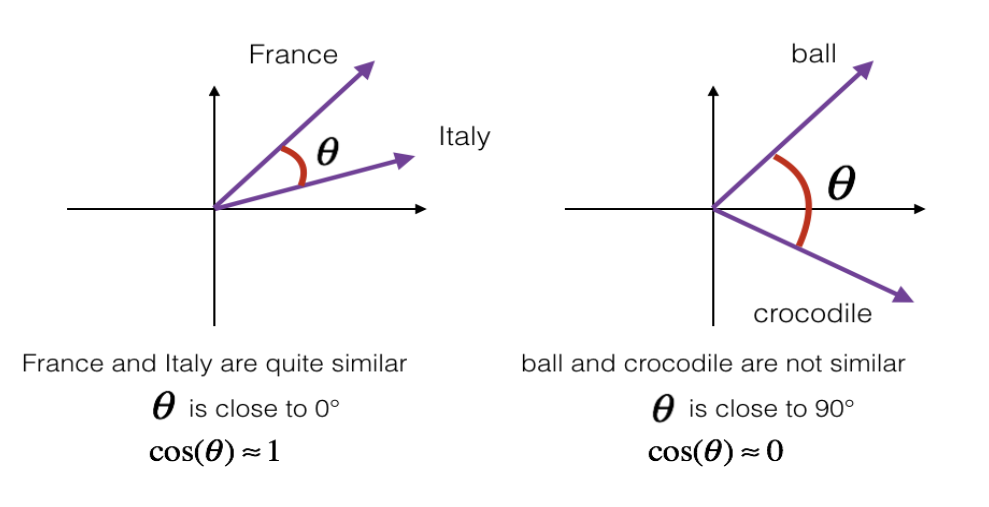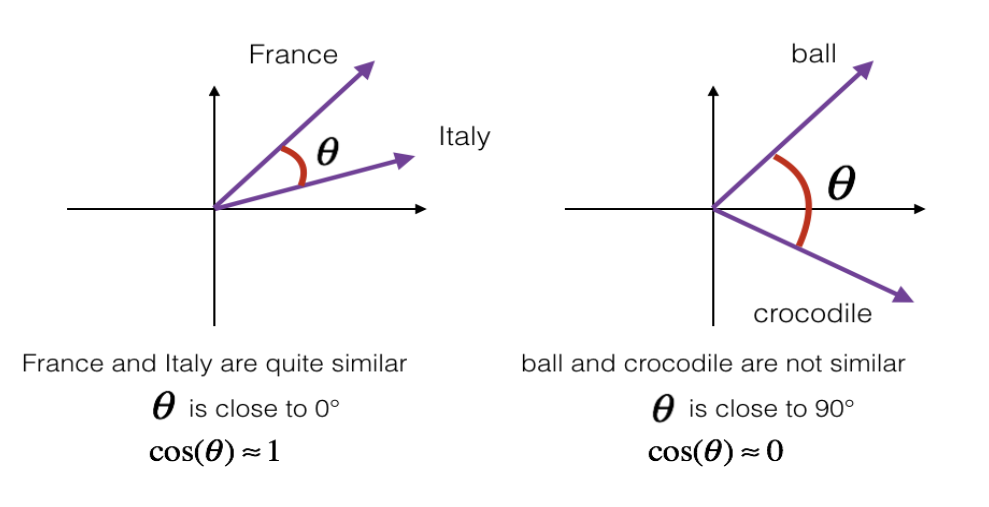))))

### **Notation des Notebooks**

Fragen und praktische Aufgaben werden hier als ❓**Frage**❓ bzw. 👋 ⚒ **Aufgabe** 👋 ⚒ gekennzeichnet. ❓**Fragen**❓ fordern Sie dazu auf Überlegungen anzustellen bevor Sie etwas praktisch testen. 👋 ⚒ **Aufgaben** 👋 ⚒ erfordern das aktive Schreiben von Code in der grauen Code-Zelle nach der Beschreibung der Aufgabe.


---

## **Lektion 11: Sentence Similarity mit und ohne spaCy**
Unter Sentence Similarity wird eine Metrik verstanden, welche die semantische Nähe von Sätzen misst, im Gegensatz zu Metriken welche die Ähnlichkeit von Wörtern in Kontexten evaluiert.

Eine Anwendung oder ein Modell der Sentence Similarity erhält einen Satz als Eingabe und misst wie ähnlich dieser Satz zu einem oder mehreren anderen Sätzen ist. Dazu wird eine bestimmte Metrik verwendet, z. B. Levenshtein-Distanz oder Kosinus-Ähnlichkeit.

### **Levenshtein-Distanz**

Die Levenshtein oder Edit-Distanz misst die Anzahl der folgenden Operationen um die eine Zeichenkette in die andere umzuwandeln: Einfügen, Löschen, Ersetzen.

Beispiel Tor-Tier:


1.   Ausgangswert: Tor (Anzahl Operationen: 0)
2.   Erstezen: "o" durch "i" zu Tir (Anzahl Operationen: 1)
3.   Einfügen: "e" zu Tier (Anzahl Operationen: 2)

Diese Messung kann auf Wörter aber auch auf längere Zeichenketten wie Sätze angewandt werden.



### **Cosine-Similarity**
Die Kosinus-Ähnlichkeit oder üblicher Cosine-Similarity bestimmt den Winkel zwischen zwei Vektoren. Dadurch ist es erforderlich erst die Wörter bzw. Sätze in Vektoren umzuwandeln, um dann den Winkel zwischen den Vektoren messen zu können.

![Cosine similarity](https://huggingface.co/datasets/huggingface-ml-4-games-course/course-images/resolve/main/en/unit1/unity/cosine.png)

Dazu muss allerdings Text erst in Vektoren verwandelt werden. Danach kann anhand der folgenden Formel der Kosinus-Wert berechnet werden.

![Kosinus](https://wikimedia.org/api/rest_v1/media/math/render/svg/5b18ea67495071781ab0d1379373872662fa6735)

Die Kosinus-Ähnlichkeit liegt zwischen −1 (genau entgegengerichtet) und 1 (genau gleichgerichtet). Bei Ähnlichkeitsanalysen von Text liegt dieser Wert in der Regel im Bereich zwischen 0 und 1. Je näher der Wert zu 1 ist desto ähnlicher sind die Zeichenketten.


### **Anwendungsbeispiele**
Diese Berechnung der Ähnlichkeiten zwischen Zeichenketten kann für viele verschiedene Anwendungen sehr hilfreich sein:


*   Suchmaschinen
*   Maschinelle Übersetzung
*   Informationsextraktion
*   viele mehr



Als erstes benötigen wir Beispielsätze. Wir verwenden zur Anschauung zwei Sätze auf Deutsch und zwei Sätze auf Englisch.

In [1]:
sentence1_de = "Ein Hund springt auf einem Trampolin."
sentence2_de = "Ein Hund hüpft auf einem Trampolin im Garten."

sentence1_en = "The quick brown fox jumps over the lazy dog."
sentence2_en = "The quick black dog jumps over the brown fox"

Im ersten Ansatz verwenden wir einen ganz simplen Ansatz, der einfach die Häufigkeiten von Wörtern des Gesamtvokabulars im Satz zählt. Nehmen wir unsere beiden deutschen Beispielsätze:


`Satz 1: Ein Hund springt auf einem Trampolin.`<br>
`Satz 2: Ein Hund hüpft auf einem Trampolin im Garten.`


Für diesen Korpus besteht unser Gesamtvokabular aus allen Wörtern dieser beiden Sätze ohne Wiederholungen:

`{'einem', 'hund', 'garten', 'auf', 'im', 'hüpft', 'springt', 'ein', 'trampolin'}`

👋 ⚒ **Aufgaben** 👋 ⚒ <br>
Schreiben Sie eine Funktion, welche einen Satz übergeben wird und die alle Wörter im Satz:


1.   Kleinschreibung aller Buchstaben im Satz mit sentence.lower()
2.   Tokenisierung aller Wörter in einem Satz und entfernen der Punkte (spaCy oder sentence.strip(".") + split())

Die Funktion soll eine Liste mit allen kleingeschriebenen Tokens eines Satzes zurückgeben. Falls Sie spaCy verwenden wollen, muss erst wieder alles geladen werden.

In [2]:
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 27.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
nlp = spacy.load("de_core_news_sm")

In [4]:
# Variante 1: ohne spaCy
def preprocess(sentence):
  # Fügen Sie hier Ihren Code hier ein
  sentence_lower = sentence.lower()
  sentence_lower_strip = sentence_lower.strip(".")
  tokens = sentence_lower_strip.split()
  return tokens

sent1_tokens = preprocess(sentence1_de)
print(sent1_tokens)

['ein', 'hund', 'springt', 'auf', 'einem', 'trampolin']


In [ ]:
# Variante 2: mit spaCy
def preprocess_spacy(sentence):
  tokens = []
  doc = nlp(sentence.lower())
  for token in doc:
    if token.pos_ != "PUNCT":
      tokens.append(token)
  return tokens

preprocess_spacy(sentence1_de)

Die von Ihnen geschriebene Funktion verwenden wir nun um die Kosinus-Ähnlichkeit zu berechnen. In der nachstehenden Code-Zelle sehen Sie die Umsetzung der Kosinus-Formel in Python zur Berechnung der Textähnlichkeit.

👋 ⚒ **Aufgaben** 👋 ⚒ <br>
Verwenden Sie den nachstehenden Code um die Ähnlichkeit der beiden englischen Beispielsätze zu berechnen. Beachten Sie, dass bei spaCy dann das geladene Modell geändert werden muss, wenn für die `preprocess`-Funktion spaCy verwendet wird.

In [6]:
import math

def vectorize(text, vocab):
    # Erstellen einer Vektordarstellung auf Basis von Worthäufigkeiten
    vector = [text.count(word) for word in vocab]
    return vector

def cosine_similarity(vec1, vec2):
    # Kosinus-Ähnlichkeit zwischen den beiden Vektoren berechnen
    dot_product = sum(x * y for x, y in zip(vec1, vec2))
    magnitude_vec1 = math.sqrt(sum(x ** 2 for x in vec1))
    magnitude_vec2 = math.sqrt(sum(y ** 2 for y in vec2))
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return 0
    else:
        return dot_product / (magnitude_vec1 * magnitude_vec2)

sentence1_tokens = preprocess(sentence1_en)
sentence2_tokens = preprocess(sentence2_en)

# Gesamtvokabular erstellen
vocabulary = set(sentence1_tokens + sentence2_tokens)

# Vektoren für die beiden Sätze berechnen
sentence1_vector = vectorize(sentence1_tokens, vocabulary)
sentence2_vector = vectorize(sentence2_tokens, vocabulary)
print("Vokabular:", vocabulary)
print("Vektor Satz 1:", sentence1_vector)
print("Vektor Satz 2:", sentence2_vector)

# Kosinus-Ähnlichkeit zwischen diesen beiden Vektoren berechnen
cos_similarity = cosine_similarity(sentence1_vector, sentence2_vector)

print("Satz 1:", sentence1_en)
print("Satz 2:", sentence2_en)
print("Ähnlichkeit:", cos_similarity)

Vokabular: {'dog', 'the', 'fox', 'quick', 'brown', 'over', 'lazy', 'black', 'jumps'}
Vektor Satz 1: [1, 2, 1, 1, 1, 1, 1, 0, 1]
Vektor Satz 2: [1, 2, 1, 1, 1, 1, 0, 1, 1]
Satz 1: The quick brown fox jumps over the lazy dog.
Satz 2: The quick black dog jumps over the brown fox
Ähnlichkeit: 0.9090909090909091


In spaCy gibt die Möglichkeit Wörter und Sätze direkt in Vektoren darzustellen, da die spaCy-Modelle bereits Vektordarstellungen bereitstellen. Diese Vektoren zählen aber nicht die im Satz enthaltenen Wörter, sondern verwenden neuronale Netze um Wörter in Vektoren darzustellen.

Falls Sie die Code-Zellen oben nicht ausgeführt haben, dann führen Sie bitte die folgenden Code-Zellen aus um die spaCy-Modelle und Programmbibliothek zu laden. Die verschiedenen vortrainierten Modelle in spaCy finden sie [hier](https://spacy.io/models/en).



In [7]:
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 26.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy
nlp = spacy.load("de_core_news_sm")

Dann kann spaCy direkt verwendet werden um Vektoren zu erstellen.

In [9]:
nlp("Tor").vector

array([-0.3866541 ,  1.4864721 ,  2.2627044 ,  4.373131  , -1.6397545 ,
       -2.8576338 ,  2.5421398 , -0.7178341 , -2.7548869 ,  0.19877231,
       -0.26690227, -3.2499797 , -0.07209927,  2.0492404 , -0.7643546 ,
        1.7343645 ,  0.22650325, -0.83428836, -2.9469306 , -1.2546612 ,
       -1.8757616 ,  2.1498652 ,  1.8170998 ,  0.20399499, -0.5866957 ,
       -1.9459215 ,  1.3294091 , -0.9072165 , -2.5966775 ,  2.5521505 ,
       -2.0311794 ,  2.155278  ,  1.3379633 ,  1.2373964 ,  2.5194373 ,
       -0.6857495 ,  0.05040181, -1.9798384 ,  5.075095  , -0.82962084,
       -0.92588013,  1.675473  ,  1.8220042 ,  1.330482  ,  0.8856053 ,
       -1.5321779 , -3.3709543 ,  1.2826461 ,  2.538719  ,  1.0055033 ,
       -2.0600889 ,  5.955442  ,  4.1726956 , -0.7843386 , -2.3304086 ,
       -0.6533785 ,  4.5863867 , -0.8016248 ,  1.7923348 ,  0.18133982,
        1.9425712 , -0.80694014, -3.6014707 ,  2.6962233 , -1.848644  ,
        0.72477007, -1.69417   , -2.723751  , -0.86200726, -1.16

Dasselbe funktionert auch für Sätze.

In [10]:
nlp(sentence1_de).vector

array([ 6.41115129e-01,  1.69784844e+00,  2.25234461e+00, -1.66279221e+00,
        3.07252584e-03, -1.58689749e+00,  1.86330330e+00,  2.70263582e-01,
        3.71635497e-01,  7.56297529e-01,  8.37871969e-01, -8.59534740e-01,
       -3.80256623e-01,  8.57793033e-01, -1.66008875e-01,  1.77732155e-01,
        1.01046002e+00,  5.52570939e-01, -2.72214442e-01,  5.91154933e-01,
        1.06508382e-01,  1.19520259e+00,  1.14360559e+00,  6.82378769e-01,
       -2.02420309e-01, -2.06527543e+00,  4.56403285e-01, -2.20843434e+00,
        7.19399273e-01,  1.75958824e+00, -1.04212485e-01,  1.13594663e+00,
       -1.26479137e+00,  1.86921561e+00,  2.25447714e-02, -8.54451284e-02,
       -3.95407975e-01, -6.39230851e-03,  3.38072032e-01,  7.61056364e-01,
       -3.36528254e+00,  2.24123716e+00,  5.24074912e-01, -2.39245579e-01,
        1.39904785e+00,  4.45788682e-01, -5.28940320e-01, -2.81037837e-01,
       -1.04931939e+00,  8.00705910e-01, -1.29143798e+00,  1.01043296e+00,
       -4.35058683e-01, -

Um nun Sätze zu vergleichen, können in spaCy enthaltene Funktionen verwendet werden.

In [11]:
doc1 = nlp(sentence1_de)
doc2 = nlp(sentence2_de)

similarity = doc1.similarity(doc2)
print(similarity)

0.920619389592944


<ipython-input-11-f3972b392b67>:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


Oder wir verwenden die Vektordarstellungen in unserer `cosine_similarity`-Funktion. Das Ergebnis ist dasselbe.

In [12]:
similarity = cosine_similarity(nlp(sentence1_de).vector, nlp(sentence2_de).vector)
print(similarity)

0.9206193825144211


👋 ⚒ **Aufgaben** 👋 ⚒ <br>
Berechnen Sie die Kosinus-Ähnlichkeit auf den beiden englischen Beispielsätzen mithilfe von spaCy. Achtung: Dazu muss das richtige Modelle in spaCy geladen werden.

In [15]:
nlp = spacy.load("en_core_web_sm")

In [16]:
# Fügen Sie hier Ihren Code hier ein
doc1 = nlp(sentence1_en)
doc2 = nlp(sentence2_en)

similarity = doc1.similarity(doc2)
print(similarity)

0.9004637547273742


<ipython-input-16-a1f4b18e6e05>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


## **Lektion 12: Sentence Similarity mit Hugging Face 🤗**

[Hugging Face](https://huggingface.co/) 🤗 ist eine Platform für maschinelles Lernen, Computerlinguistik und Data Science. NLP-Expert*innen und -Begeisterte teilen auf Hugging Face vortrainierte Modelle, Datensätze, Code und Informationen.

Die Platform selbst bietet einheitliche Methoden um Modelle und Datensätze in Python zu laden und zu verwenden. Um Hugging Face in Google Colab nutzen zu können müssen wir zwei Bibliotheken von Hugging Face installieren.

In [17]:
!pip install -U sentence-transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Der große Unterschied zu den vorherigen Methoden ist, dass wir mithilfe von Hugging Face die Vektordarstellung von großen vortrainierten Modellen abrufen können.

In [19]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')

# Vektordarstellung der beiden Sätze abrufen
embedding_1= model.encode(sentence1_en)
embedding_2 = model.encode(sentence2_en)

cos_sim = util.pytorch_cos_sim(embedding_1, embedding_2)
print("Die Kosinus-Ähnlichkeit ist:", cos_sim.item())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Die Kosinus-Ähnlichkeit ist: 0.8094106316566467


Mithilfe von Hugging Face können wir auch bereits existierende Datensätze laden und verwenden, z. B.[Glue](https://huggingface.co/datasets/nyu-mll/glue) mit vielen verschiedenen Tasks einschließlich Semantic Textual Similarity.

In [20]:
from datasets import load_dataset

dataset = load_dataset("nyu-mll/glue", "stsb")

print(dataset)

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 5749
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1379
    })
})


Dann können die einzelnen drei Teile des Datensatzes `train`, `validation`, `test` direkt angesprochen werden und wie ein Key eines Dictionarys behandelt werden.



In [29]:
print(dataset['train'][10])

{'sentence1': 'The man hit the other man with a stick.', 'sentence2': 'The man spanked the other man with a stick.', 'label': 4.199999809265137, 'idx': 10}


Und über diesen Datentypen kann auch iteriert werden. Die Funktion `select(range(10))`dient hier der Auswahl von 10 Beispielen.  

In [30]:
for line in dataset['train'].select(range(10)):
  print(line)

{'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'label': 5.0, 'idx': 0}
{'sentence1': 'A man is playing a large flute.', 'sentence2': 'A man is playing a flute.', 'label': 3.799999952316284, 'idx': 1}
{'sentence1': 'A man is spreading shreded cheese on a pizza.', 'sentence2': 'A man is spreading shredded cheese on an uncooked pizza.', 'label': 3.799999952316284, 'idx': 2}
{'sentence1': 'Three men are playing chess.', 'sentence2': 'Two men are playing chess.', 'label': 2.5999999046325684, 'idx': 3}
{'sentence1': 'A man is playing the cello.', 'sentence2': 'A man seated is playing the cello.', 'label': 4.25, 'idx': 4}
{'sentence1': 'Some men are fighting.', 'sentence2': 'Two men are fighting.', 'label': 4.25, 'idx': 5}
{'sentence1': 'A man is smoking.', 'sentence2': 'A man is skating.', 'label': 0.5, 'idx': 6}
{'sentence1': 'The man is playing the piano.', 'sentence2': 'The man is playing the guitar.', 'label': 1.600000023841858, 'idx': 7}
{'sentence1'

👋 ⚒ **Aufgaben** 👋 ⚒ <br>
Berechnen Sie die Kosinus-Ähnlichkeit auf den ersten 10 Beispielen auf dem Datensatz und vergleichen Sie wie weit der Wert vom Goldstandard im Datensatz ist. Achtung: Der Goldstandard liegt im Wertebereich von 0 (vollkommen unterschiedlich) bis zu 5 (inhaltlich äquivalent).  

In [41]:
# Fügen Sie hier Ihren Code hier ein
for line in dataset['train'].select(range(10)):
  doc1_sts = nlp(line["sentence1"])
  doct2_sts = nlp(line["sentence2"])

  similarity = doc1_sts.similarity(doct2_sts)
  glue_sim = line["label"]
  print(line["sentence1"], line["sentence2"])
  print(similarity, glue_sim)


A plane is taking off. An air plane is taking off.
0.9231937196328954 5.0
A man is playing a large flute. A man is playing a flute.
0.9461598569757113 3.799999952316284
A man is spreading shreded cheese on a pizza. A man is spreading shredded cheese on an uncooked pizza.
0.9431200892939484 3.799999952316284
Three men are playing chess. Two men are playing chess.
0.9889959511973437 2.5999999046325684
A man is playing the cello. A man seated is playing the cello.
0.8987378067993862 4.25
Some men are fighting. Two men are fighting.
0.888563850953388 4.25
A man is smoking. A man is skating.
0.9655664610940068 0.5
The man is playing the piano. The man is playing the guitar.
0.9580573140421392 1.600000023841858
A man is playing on a guitar and singing. A woman is playing an acoustic guitar and singing.
0.919173429100247 2.200000047683716
A person is throwing a cat on to the ceiling. A person throws a cat on the ceiling.
0.891119146577079 5.0


<ipython-input-41-682996a1f775>:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1_sts.similarity(doct2_sts)
